# Improving on the baseline

There are two obvious things we could try to do here (before going out to hunt for more data, of course).

We have obvious overfitting problem, so any technique that helps with regularization should help if we use it judiciously.

Let's try a very common technique:and dropout

In [1]:
from keras.preprocessing.image import ImageDataGenerator
import os

base_dir = 'data/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_datagen = ImageDataGenerator(rescale=1 / 255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1 / 255)

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(120,120),
                                                    batch_size=100,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(120,120),
                                                        batch_size=100,
                                                        class_mode='binary')

Using TensorFlow backend.


Found 4765 images belonging to 2 classes.
Found 888 images belonging to 2 classes.


# Dropout

In [12]:
import keras
from keras import backend as K

from keras.layers import Conv2D, MaxPooling2D, InputLayer, Flatten, Dense, Dropout

detector = keras.Sequential()
detector.add(Conv2D(32, (3, 3), activation='relu', input_shape=(120, 120, 3)))
detector.add(MaxPooling2D((2,2)))
detector.add(Conv2D(32, (3, 3), activation='relu'))
detector.add(MaxPooling2D((2,2)))
detector.add(Flatten())
detector.add(Dense(128, activation='relu'))
detector.add(Dropout(.5))
detector.add(Dense(128, activation='relu'))
detector.add(Dropout(.5))
detector.add(Dense(64, activation='relu'))
detector.add(Dropout(.5))
detector.add(Dense(1, activation='sigmoid'))

detector.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 118, 118, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 57, 57, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               3211392   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
__________

In [14]:
from keras.optimizers import Adam

detector.compile(loss='binary_crossentropy',
                     optimizer=Adam(lr=1e-3),
                     metrics=['acc'])

history = detector.fit_generator(train_generator,
                                 steps_per_epoch=20,
                                 epochs=50,
                                 validation_data=validation_generator,
                                 validation_steps=20)

Epoch 1/50
20/20 [==============================] - 46s 2s/step - loss: 0.7877 - acc: 0.5325 - val_loss: 0.6602 - val_acc: 0.5598
Epoch 2/50
20/20 [==============================] - 43s 2s/step - loss: 0.6510 - acc: 0.5770 - val_loss: 0.6165 - val_acc: 0.5598
Epoch 3/50
20/20 [==============================] - 39s 2s/step - loss: 0.6033 - acc: 0.6187 - val_loss: 0.5281 - val_acc: 0.7303
Epoch 4/50
20/20 [==============================] - 41s 2s/step - loss: 0.5449 - acc: 0.6925 - val_loss: 0.4571 - val_acc: 0.8066
Epoch 5/50
20/20 [==============================] - 40s 2s/step - loss: 0.5010 - acc: 0.7695 - val_loss: 0.4644 - val_acc: 0.8066
Epoch 6/50
20/20 [==============================] - 40s 2s/step - loss: 0.4987 - acc: 0.7762 - val_loss: 0.3929 - val_acc: 0.8524
Epoch 7/50
20/20 [==============================] - 39s 2s/step - loss: 0.4830 - acc: 0.7811 - val_loss: 0.4576 - val_acc: 0.8015
Epoch 8/50
20/20 [==============================] - 43s 2s/step - loss: 0.4880 - acc: 0.78

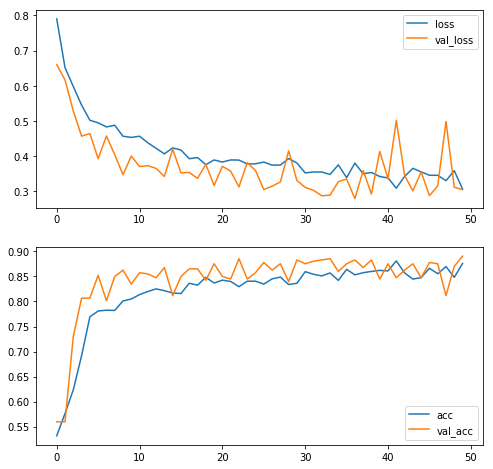

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

f, axes = plt.subplots(2,1)

f.set_size_inches(8,8)


axes[0].plot(history.epoch, history.history['loss'], label='loss')
axes[0].plot(history.epoch, history.history['val_loss'], label='val_loss')
axes[0].legend()

axes[1].plot(history.epoch, history.history['acc'], label='acc')
axes[1].plot(history.epoch, history.history['val_acc'], label='val_acc')
axes[1].legend()

OK! so we have prevented overfitting! Further training will manage to achieve it, so we'll stop here

In [16]:
from keras.optimizers import Adam

detector.compile(loss='binary_crossentropy',
                     optimizer=Adam(lr=1e-4),
                     metrics=['acc'])

history = detector.fit_generator(train_generator,
                                 steps_per_epoch=20,
                                 epochs=50,
                                 validation_data=validation_generator,
                                 validation_steps=20)

Epoch 1/50
20/20 [==============================] - 40s 2s/step - loss: 0.3243 - acc: 0.8701 - val_loss: 0.3059 - val_acc: 0.8855
Epoch 2/50
20/20 [==============================] - 37s 2s/step - loss: 0.3084 - acc: 0.8751 - val_loss: 0.2970 - val_acc: 0.8906
Epoch 3/50
20/20 [==============================] - 38s 2s/step - loss: 0.2949 - acc: 0.8825 - val_loss: 0.3084 - val_acc: 0.8855
Epoch 4/50
20/20 [==============================] - 39s 2s/step - loss: 0.3222 - acc: 0.8646 - val_loss: 0.3033 - val_acc: 0.8855
Epoch 5/50
20/20 [==============================] - 38s 2s/step - loss: 0.2918 - acc: 0.8825 - val_loss: 0.3350 - val_acc: 0.8779
Epoch 6/50
20/20 [==============================] - 38s 2s/step - loss: 0.2899 - acc: 0.8840 - val_loss: 0.3048 - val_acc: 0.8855
Epoch 7/50
20/20 [==============================] - 37s 2s/step - loss: 0.3135 - acc: 0.8760 - val_loss: 0.3363 - val_acc: 0.8728
Epoch 8/50
20/20 [==============================] - 39s 2s/step - loss: 0.2904 - acc: 0.88

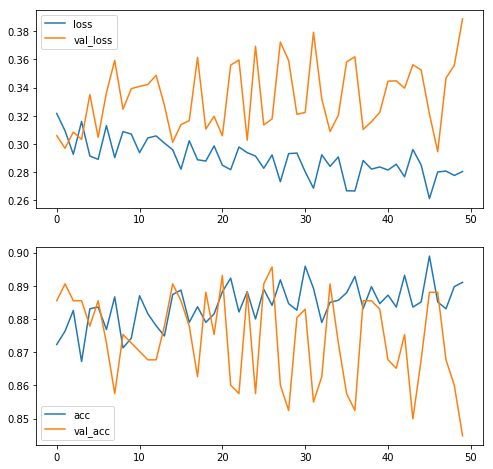

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

f, axes = plt.subplots(2,1)

f.set_size_inches(8,8)


axes[0].plot(history.epoch, history.history['loss'], label='loss')
axes[0].plot(history.epoch, history.history['val_loss'], label='val_loss')
axes[0].legend()

axes[1].plot(history.epoch, history.history['acc'], label='acc')
axes[1].plot(history.epoch, history.history['val_acc'], label='val_acc')
axes[1].legend()